In [1]:
# significance and P-values
# Monday 30 September 2024

# Bayesian approach
#
# ssfff
#
# H0  f = f0 = 0.2
# 
# H1  f > f0 = 0.2
#
import warnings
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.special import logsumexp

#
# integral_{fmin}^{fmax} P(n|f,N) P(f) df
#
# P(n|f,N) = N!/(n!*(N-x)!) f^n (1-f)^{N-n}
#
# prior P(f) = 1/(fmax-fmin)
#
def integral(fmin, fmax, n, N):
    
    not_n = N - n
    
    f_bin  = 0.0001
    f_nbin = int((fmax-fmin)/f_bin)
    f      = np.linspace(fmin, fmax, f_nbin) # the probability of contracting disease

    # the prior
    sigma    = fmax - fmin
    prior    = 1/sigma
    logprior = -np.log(sigma)
    
    # I am ignoring the factorial term as it is only dependent on the data
    # (N,n) and it will cancel out when I take the ratio of 
    # the P(D|H1)/p(D|H0)
    #
    integral = 0
    logval_array = []
    
    for b in range(f_nbin):
        f     = fmin + b*f_bin
        not_f = 1.0 - f
        
        logval = n * np.log(f) + not_n * np.log(not_f)
        val    = np.exp(logval)
        
        # sum the terms directly
        integral += val
        
        # append the log values to a list to later do logsumexp
        logval_array.append(logval)
    
    # mutiply by the prior*dx which is common to all summed terms
    integral    *= f_bin * prior
    
    # do the logsumexp of the logvalues
    logintegral  = logsumexp(logval_array)
    # sum the log(prior) + log(dx)
    logintegral += np.log(f_bin) + logprior
    #print(logval_array)
    
    return logintegral, integral

# Data
N = 5
n = 3

#H0 = |f - f0=0.2| < 0.01
#
fmin_H0 = 0.19
fmax_H0 = 0.21
logintegral_H0, integral_H0 = integral(fmin_H0, fmax_H0, n, N)
print ("P(H0| ssfff) = ", integral_H0, 
       "\nP(H0| ssfff) = exp(", logintegral_H0, ") = ", np.exp(logintegral_H0))

#H1 = f > f0=0.2
#
fmin_H1 = 0.2
fmax_H1 = 0.99999
logintegral_H1, integral_H1 = integral(fmin_H1, fmax_H1, n, N)
print ("\nP(H1| ssfff) = ", integral_H1, 
       "\nP(H1| ssfff) = exp(", logintegral_H1,") = ", np.exp(logintegral_H1))

# the ratio P(H1/D)/P(H0/D)
ratio    = integral_H0/integral_H1
logratio = logintegral_H0 - logintegral_H1

print("\nthe ratio P(H0|D)/P(H1|D)")
print("H0/H1 = ", ratio, "\nexp(", logratio, ") = ", np.exp(logratio))

P(H0| ssfff) =  0.005094601007019979 
P(H0| ssfff) = exp( -5.279573926066731 ) =  0.0050946010070199825

P(H1| ssfff) =  0.02048057593928289 
P(H1| ssfff) = exp( -3.888278357170945 ) =  0.020480575939282986

the ratio P(H0|D)/P(H1|D)
H0/H1 =  0.24875281936033106 
exp( -1.391295568895786 ) =  0.24875281936033003



H0: 0.19 < f < 0.21
H1: 0.2 < f < 0.9999999

the ratio P(H0|D)/P(H1|D)
H0/H1 =  0.24875589771495019


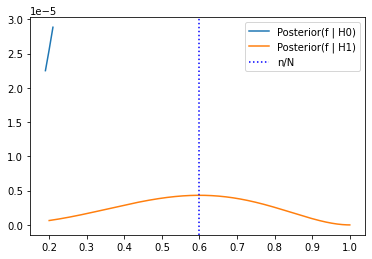

In [2]:
import scipy.special as special

N = 5
n = 3

# Posterior P(f|data, H)
#
# P(f|data, H) propto P(n|f,N,H) * P(f|H)
#
# where,
#
# P(n|f,N) = N!/(n!*(N-n)!) f^n (1-f)^{N-n}
#
# prior P(f|H) = 1/(fmax-fmin)
#
def posterior(fmin, fmax, f_bin, n, N):
    
    not_n = N - n
    
    f_nbin = int((fmax-fmin)/f_bin)
    f_val  = np.linspace(fmin, fmax, f_nbin) 
 
    # the prior
    sigma    = fmax - fmin
    prior    = 1/sigma
    logprior = -np.log(sigma)
    
    # I am ignoring the factorial term as it is only dependent on the data
    # (N,n) and it will cancel out when I take the ratio of 
    # the P(H1/D)/p(H0/D)
    #
    integral   = 0
    post_array = []
    
    for b in range(f_nbin):
        f     = fmin + b*f_bin
        not_f = 1.0 - f
        
        logpost   = n * np.log(f) + not_n * np.log(not_f) + np.log(f_bin) + logprior        
        integral += np.exp(logpost)
        post_array.append(np.exp(logpost))
        
    return integral, post_array, f_val

# Data
N = 5
n = 3

f_bin   = 0.0001

fmin_H0 = 0.19
fmax_H0 = 0.21
fmin_H1 = 0.20
fmax_H1 = 0.9999999

# posterior probs as a function of data    
int_H0, posterior_H0, f_H0 = posterior(fmin_H0, fmax_H0, f_bin, n, N)
int_H1, posterior_H1, f_H1 = posterior(fmin_H1, fmax_H1, f_bin, n, N)

print("\nH0:", fmin_H0, "< f <", fmax_H0)
print("H1:", fmin_H1, "< f <", fmax_H1)
print("\nthe ratio P(H0|D)/P(H1|D)")
print("H0/H1 = ", int_H0/int_H1)
plt.plot(f_H0, posterior_H0, label = "Posterior(f | H0)")
plt.plot(f_H1, posterior_H1, label = "Posterior(f | H1)")
plt.axvline(x=n/N, color='b', ls=':', label='n/N')

plt.legend(loc="upper right")
plt.show()



H0: 1e-05 < f < 0.31
H1: 0.2 < f < 0.9999999

the ratio P(H0|D)/P(H1|D)
H0/H1 =  0.20627371736288505


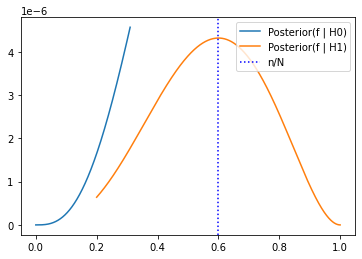

In [3]:
fmin_H0 = 0.00001
fmax_H0 = 0.31
fmin_H1 = 0.20
fmax_H1 = 0.9999999

# posterior probs as a function of data    
int_H0, posterior_H0, f_H0 = posterior(fmin_H0, fmax_H0, f_bin, n, N)
int_H1, posterior_H1, f_H1 = posterior(fmin_H1, fmax_H1, f_bin, n, N)

print("\nH0:", fmin_H0, "< f <", fmax_H0)
print("H1:", fmin_H1, "< f <", fmax_H1)
print("\nthe ratio P(H0|D)/P(H1|D)")
print("H0/H1 = ", int_H0/int_H1)
plt.plot(f_H0, posterior_H0, label = "Posterior(f | H0)")
plt.plot(f_H1, posterior_H1, label = "Posterior(f | H1)")
plt.axvline(x=n/N, color='b', ls=':', label='n/N')

plt.legend(loc="upper right")
plt.show()


In [4]:
# SHAPE data for RNaseP
#
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from mpl_toolkits import mplot3d
from scipy.special import logsumexp
import time

shape_file_u = "data/RNASEP_DMS_0000.rdat.outu"
shape_file_p = "data/RNASEP_DMS_0000.rdat.outp"

datau = pd.read_csv(shape_file_u, sep=" ", header=None)[2]
datap = pd.read_csv(shape_file_p, sep=" ", header=None)[2]
datu  = datau.values.tolist()
datp  = datap.values.tolist()
dat   = datu+datp

Nu = len(datu)
Np = len(datp)
N  = len(dat)
print("Np ", Np, "Nu ", Nu, "N ", N)

# Student's T-test
ttest = stats.ttest_ind(datau, datap)
print("ttest ", ttest)

#
#  ttest_statistic
#
mean_u = np.mean(datau)
mean_p = np.mean(datap)
err2_u = (Nu-1)*np.var(datau)
err2_p = (Np-1)*np.var(datap)
denom  = np.sqrt((err2_u + err2_p)/(Nu+Np-2)) * np.sqrt(1/Nu + 1/Np)
ttest_val = abs(mean_u-mean_p) / denom
print("ttest statistic? ", ttest_val)



Np  160 Nu  105 N  265
ttest  Ttest_indResult(statistic=6.061847210290991, pvalue=4.64943430001133e-09)
ttest statistic?  6.090552310798687


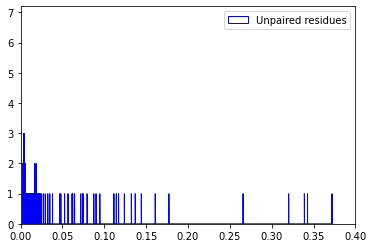

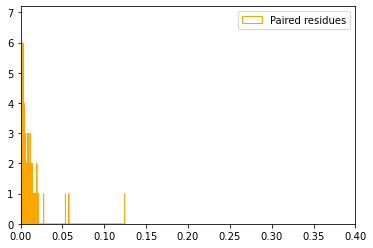

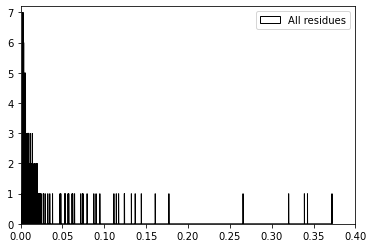

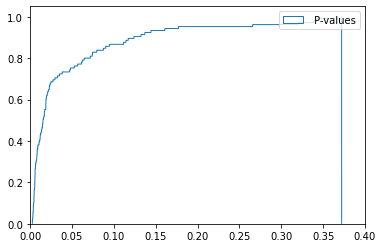

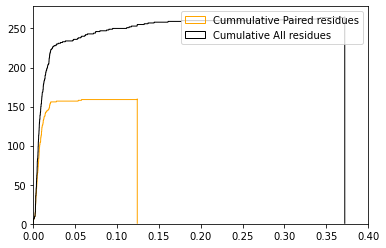

In [5]:
# P(r|U) P(r|P)
nbin = 10000
datu_h = plt.hist(datu, color="b", histtype="step", bins=nbin, label='Unpaired residues')
plt.ylim(0,7.2)
plt.xlim(0,0.40)
plt.legend()
plt.show()

datp_h = plt.hist(datp, color="orange", histtype="step", bins=nbin, label='Paired residues')
plt.legend()
plt.ylim(0,7.2)
plt.xlim(0,0.40)
plt.show()

dat_h  = plt.hist(dat, color="black", histtype="step", bins=nbin, label='All residues')
plt.legend()
plt.ylim(0,7.2)
plt.xlim(0,0.40)
plt.show()

# the CDF for datau is the p-value
datu_cdf, datu_bins, datu_patches = plt.hist(datu, density = True, cumulative=True, histtype="step", bins=nbin, label=" P-values")
plt.legend()
plt.xlim(0,0.40)
plt.show()

pval = datu_cdf

# cumulative count of reactivities for pair/all residues
datp_ucdf, datp_bins, datp_patches = plt.hist(datp, color="orange",density = 0, cumulative=True, histtype="step", bins=nbin, label='Cummulative Paired residues')
dat_ucdf,  dat_bins,  dat_patches  = plt.hist(dat,  color="black", density = 0, cumulative=True, histtype="step", bins=nbin, label='Cumulative All residues')
plt.legend()
plt.xlim(0,0.40)
plt.show()


r_target 0.0026 pval_target 0.0190 Found 25.0 / 265 
expected FP 5.05 
= [FDR 0.2019 x 25.0 ] 
= [pval 0.0190 x 265 ] 
found FP 2.00 
found positives 23.00 / 160.00 sensitivity =  14.37 %

r_target 0.0027 pval_target 0.0190 Found 25.0 / 265 
expected FP 5.05 
= [FDR 0.2019 x 25.0 ] 
= [pval 0.0190 x 265 ] 
found FP 2.00 
found positives 23.00 / 160.00 sensitivity =  14.37 %

r_target 0.0027 pval_target 0.0190 Found 28.0 / 265 
expected FP 5.05 
= [FDR 0.1803 x 28.0 ] 
= [pval 0.0190 x 265 ] 
found FP 2.00 
found positives 26.00 / 160.00 sensitivity =  16.25 %

r_target 0.0028 pval_target 0.0190 Found 29.0 / 265 
expected FP 5.05 
= [FDR 0.1741 x 29.0 ] 
= [pval 0.0190 x 265 ] 
found FP 2.00 
found positives 27.00 / 160.00 sensitivity =  16.88 %

r_target 0.0029 pval_target 0.0286 Found 36.0 / 265 
expected FP 7.57 
= [FDR 0.2103 x 36.0 ] 
= [pval 0.0286 x 265 ] 
found FP 3.00 
found positives 33.00 / 160.00 sensitivity =  20.62 %

r_target 0.0030 pval_target 0.0286 Found 36.0 / 265 
e

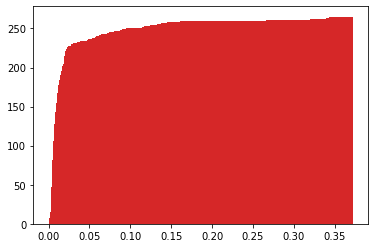

In [6]:
# Wednesday 2 Oct 2024
#
# P-value (r_target) = P(r < r_target | U)
#
nbin = 5000
pval, react, patches = plt.hist(datu, density = True, cumulative=True, bins=nbin, label=" P-values")

# Cumulative 
datp_cum, datp_bins, foo = plt.hist(datp, density = 0, cumulative=True, bins=nbin, label='Cummulative Paired residues')
datu_cum, datu_bins, foo = plt.hist(datu, density = 0, cumulative=True, bins=nbin, label='Cumulative All residues')
dat_cum,  dat_bins,  foo = plt.hist(dat,  density = 0, cumulative=True, bins=nbin, label='Cumulative All residues')

P = Np # P = The Trues (basepaired residues)

for i in range(nbin):
    # We use the P(r|U) as describing the null hypothesis
    pval_target = pval[i]
    r_target    = react[i]
    
    # do the analysis up to a point.
    # max r_target = 0.007
    r_target_max = 0.007
    if r_target > r_target_max:
        break
    
    #
    # r <= r_target are going to be assigned P
    # r >  r_target are going to be assigend U
    #
    
    # F = Found paired = total residues (out of N) with r <= r_target
    #
    for j in range(nbin):
        if dat_bins[j] <= r_target:
            F = dat_cum[j]      # F = Found
        if datp_bins[j] <= r_target:
            PF = datp_cum[j]    # PF = P and Found
        if datu_bins[j] <= r_target:
            UF = datu_cum[j]    # UF = U and Found
                
    # FP = expected false positives = 
    #    = expected from null to have r < r_target
    #
    FP  = pval_target*N    # expected false positives
    FDR = FP/F               # False Discovery Rate = 
                             #            fraction of FP per found
              
    sen = PF/P * 100  # sensitivity = True basepairs found with  r < r_target
        
        
    # print all those numbers
    #
    #  N = 265 = # total residues
    #  P = 160 = # paired residues 
    #  U = 105 = # unpaired residues 
    #
    # r_target  pval_target F(found)/N [#PF #UF]  sen(PF/P) exp_FP   FDR of F     pval of N          
    # 
    print("\nr_target", '{:.4f}'.format(r_target), "pval_target", '{:.4f}'.format(pval_target), 
          "Found", F, "/", N, 
          "\nexpected FP", '{:.2f}'.format(FP), 
          "\n= [FDR", '{:.4f}'.format(FDR), "x", F, "]",
          "\n= [pval", '{:.4f}'.format(pval_target), "x", N, "]",
          "\nfound FP", '{:.2f}'.format(UF),
          "\nfound positives", '{:.2f}'.format(PF), "/", '{:.2f}'.format(P), 
          "sensitivity = ", '{:.2f}'.format(sen), "%"
         )

r_target 0.0026 pval_target 0.0190 Found 25.0 / 265 
expected FP 5.05 
= [FDR 0.2019 x 25.0 ] 
= [pval 0.0190 x 265 ] 
found FP 2.00 
found positives 23.00 / 160.00 sensitivity =  14.37 %

       
